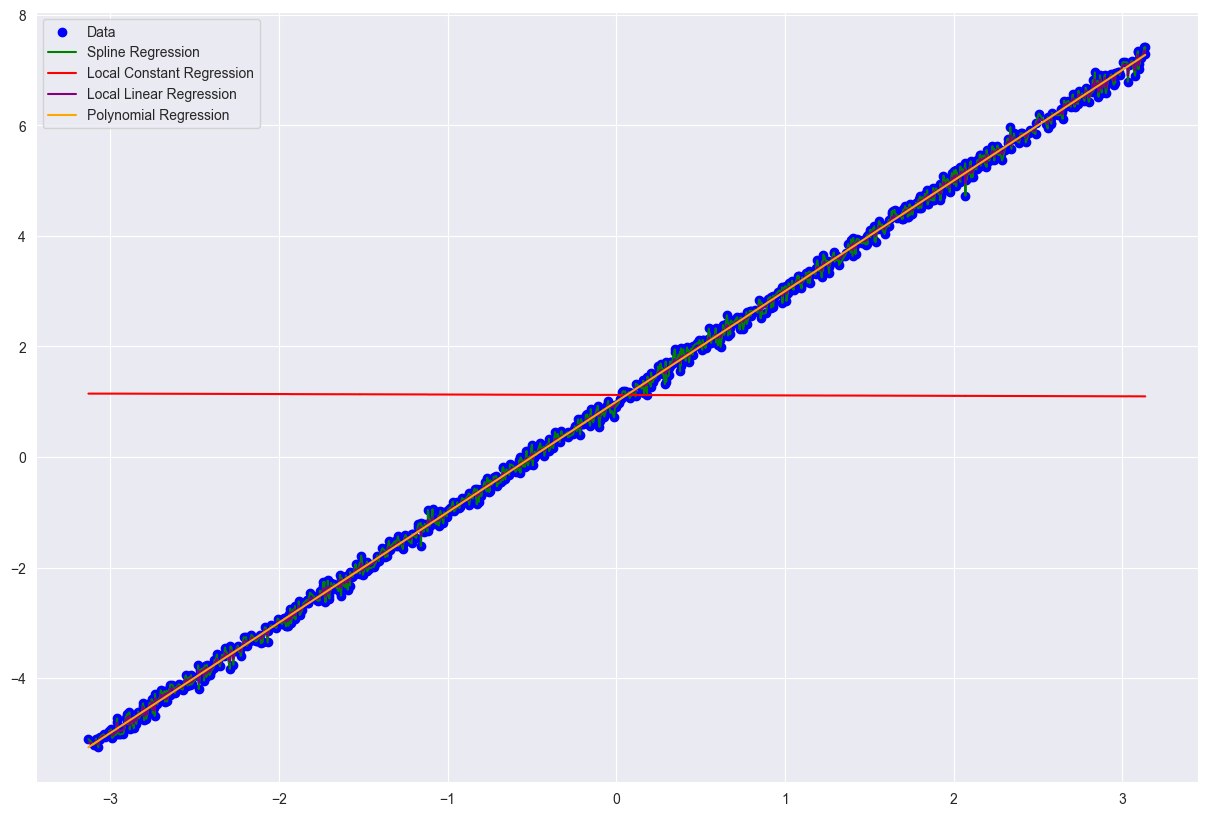

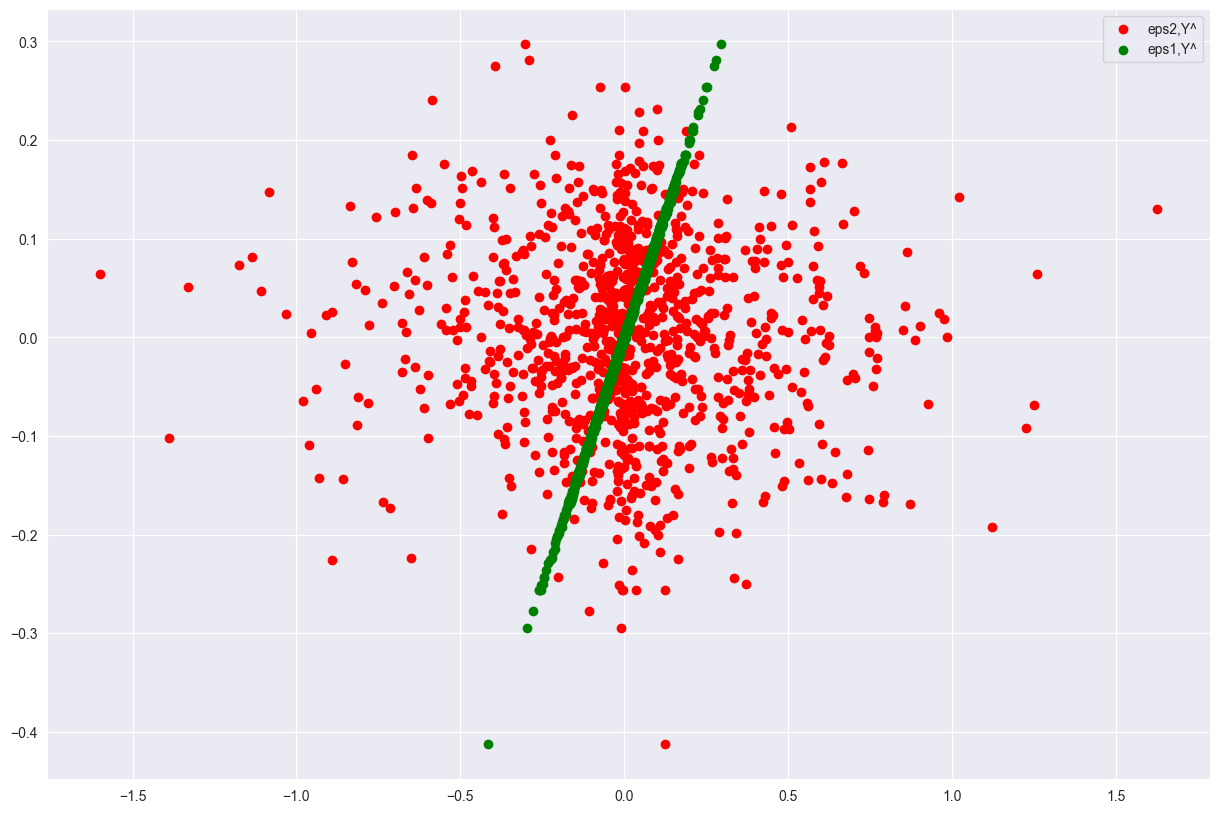

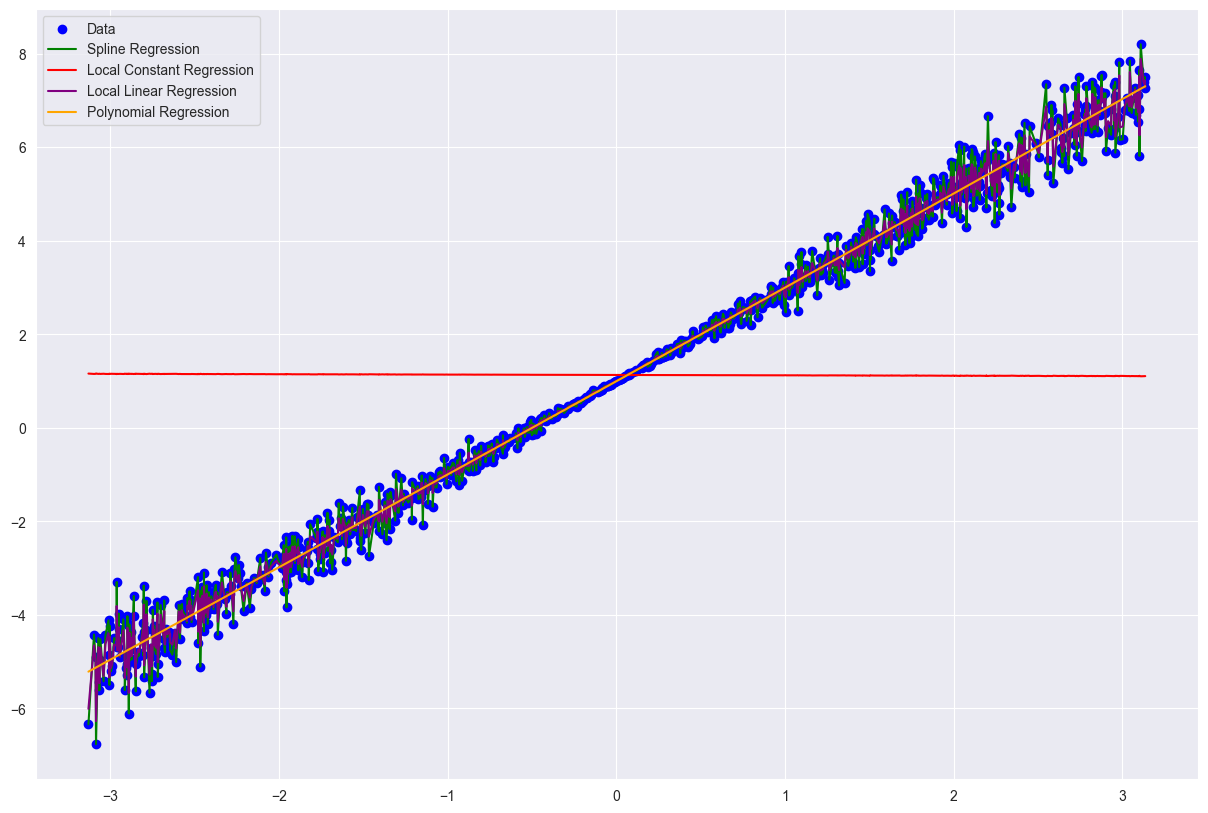

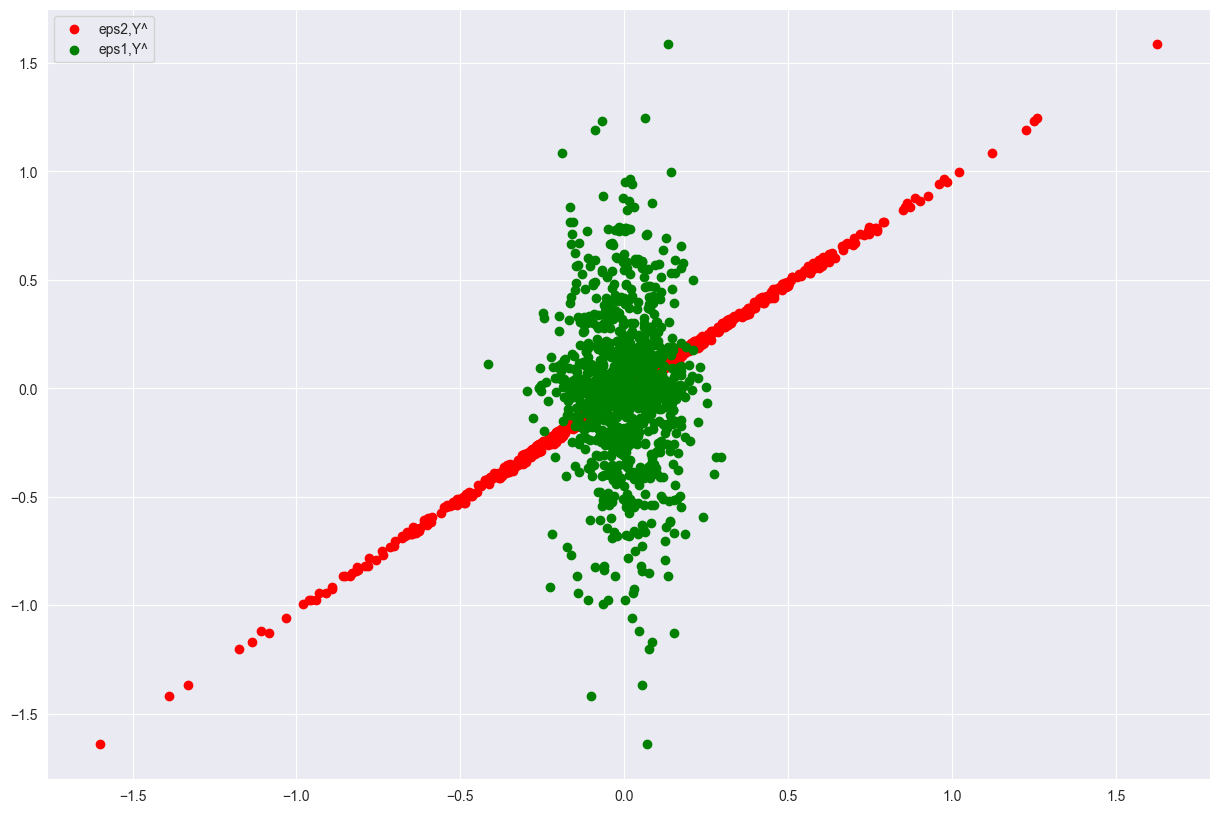

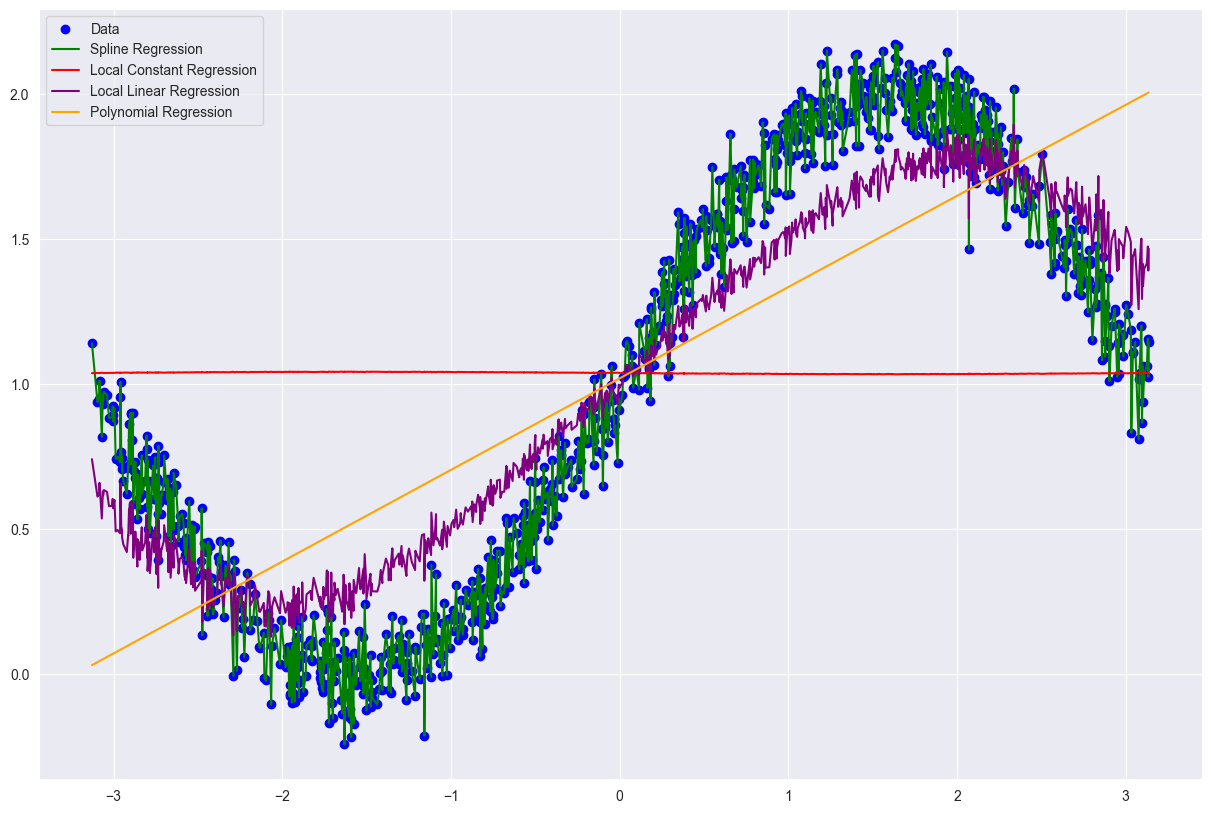

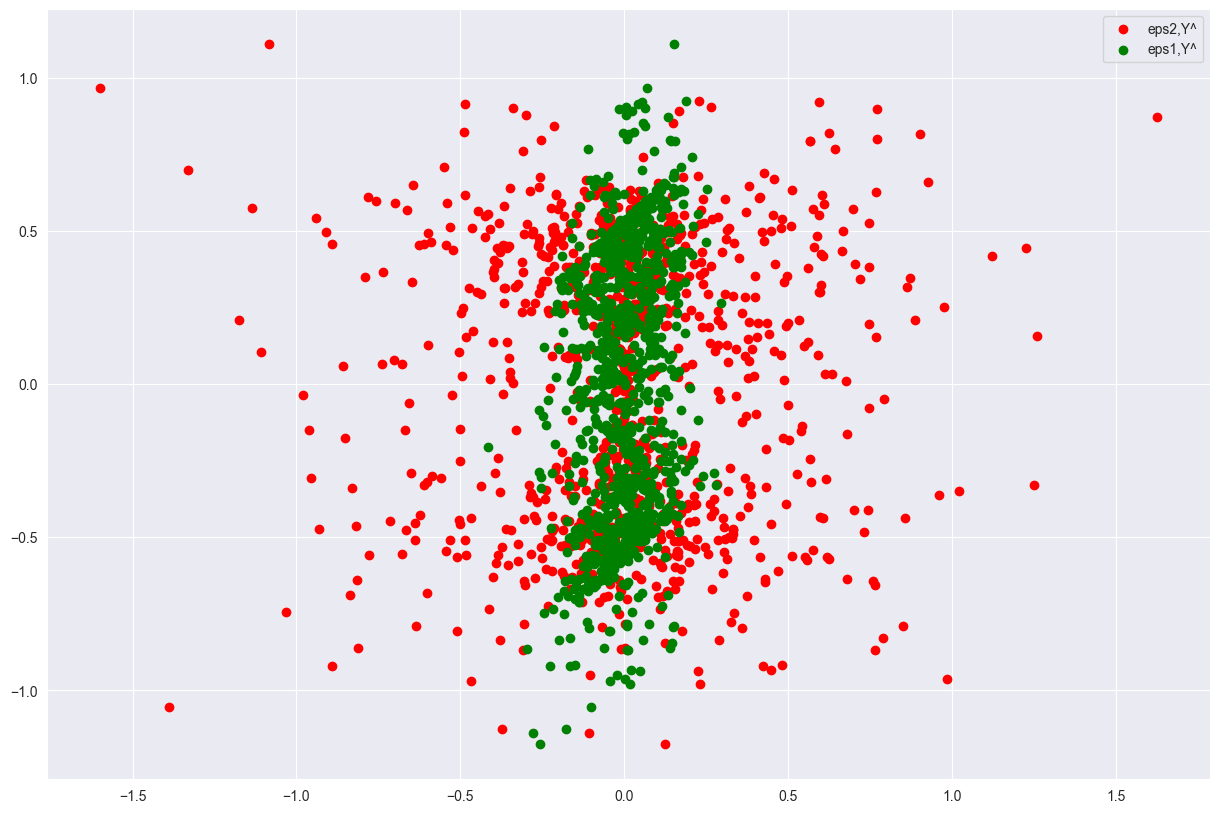

/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_60625/506283749.py:144: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_plt = b[0] + b[1] * X + b[2]* X**2


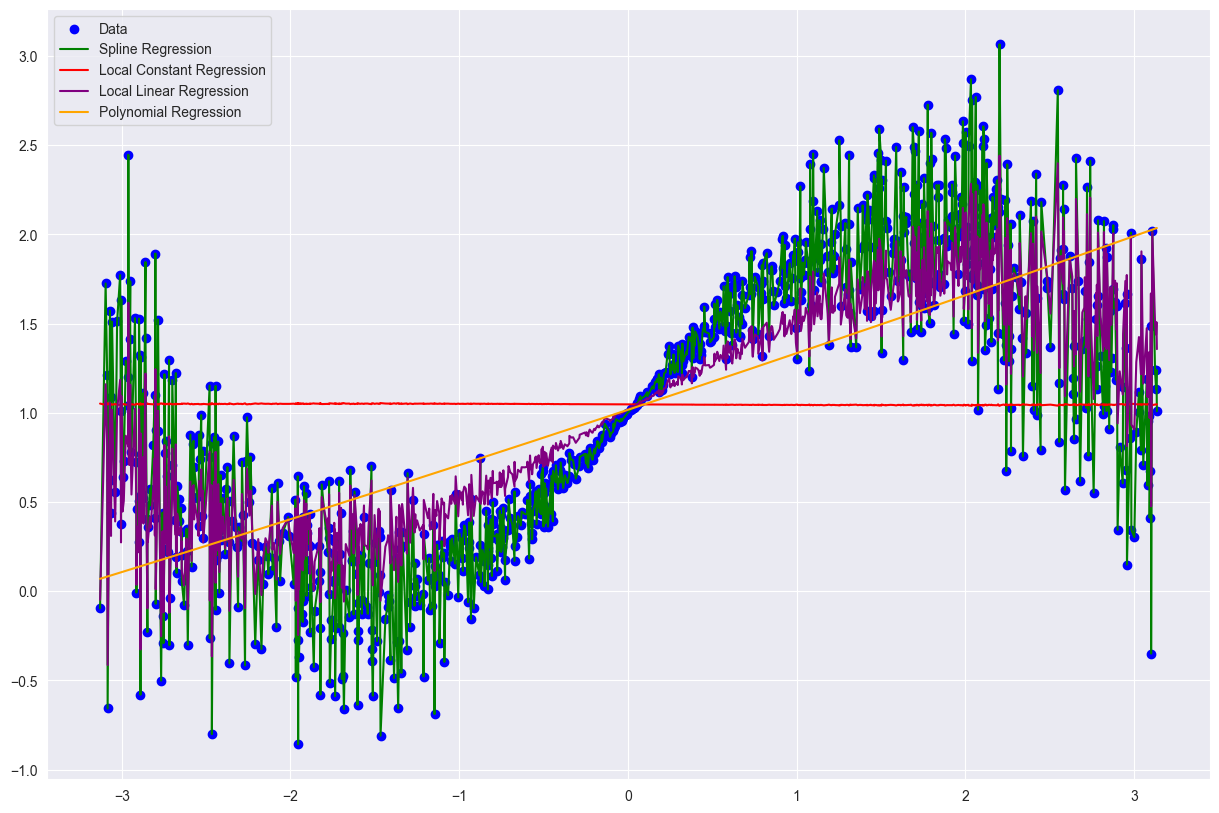

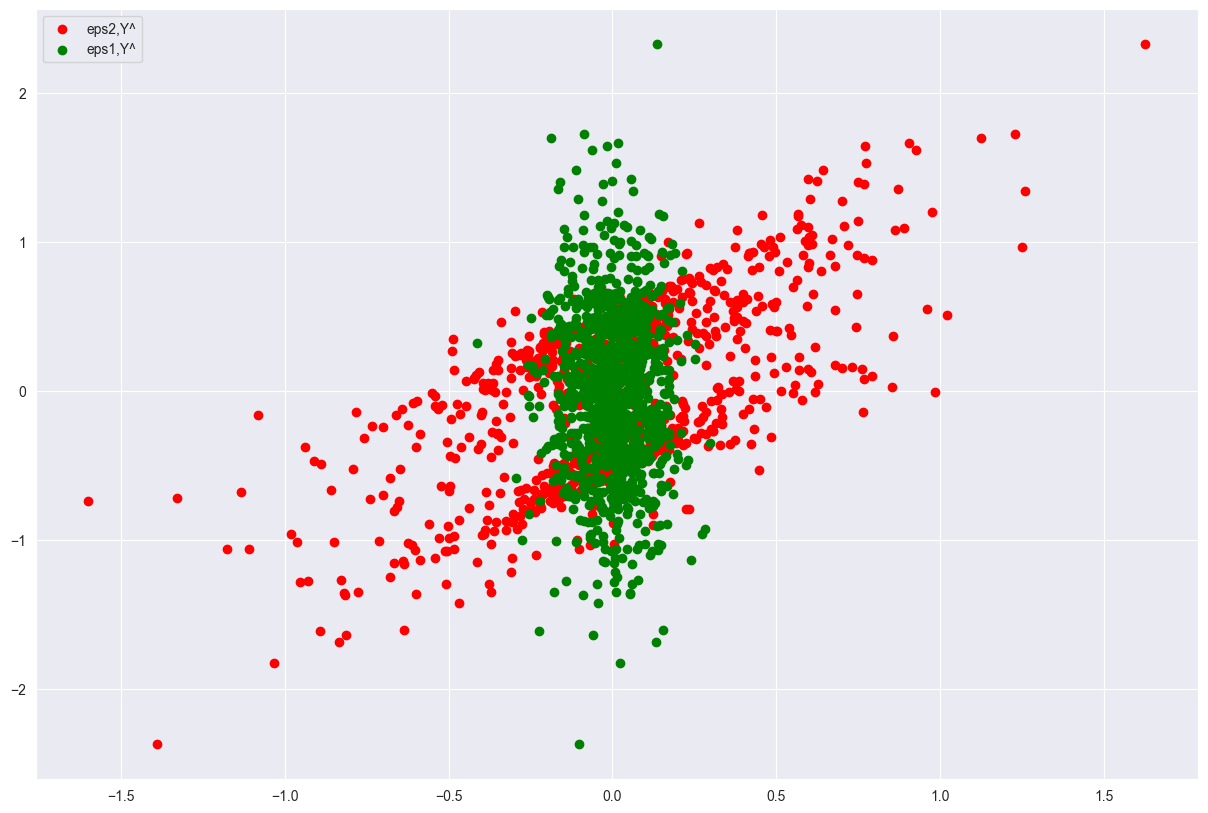

In [27]:
from scipy.interpolate import splrep, splev
import statsmodels
import pc
import statsmodels.api as sm
import statsmodels.stats.api as ssa
from sklearn.linear_model import LinearRegression
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv


n = 1000

#Var a
X0 = np.zeros(n)
X = np.random.uniform(-math.pi,math.pi, n)
X.sort()
eps_1 = np.random.normal(0,0.1, 1000)
eps_2 = np.random.normal(0, abs(X/5), n)
Y_11 = 2*X + 1 + eps_1
Y_12 = 2*X + 1 + eps_2
Y_21 = np.sin(X) + eps_1 +1
Y_22 = np.sin(X) + eps_2 +1
df = pd.DataFrame({'X': X, 
                   'Y_11': Y_11, 
                   'Y_12': Y_12, 
                   'Y_21': Y_21, 
                   'Y_22': Y_22})

# model = statsmodels.nonparametric.kernel_regression.KernelReg(X, Y_11, 'u', reg_type = "lc").fit() 
# print(model)

# Локально постоянная и линейная регрессия
def local_constant_regression(X, Y, kernel):
    model = sm.nonparametric.KernelReg(Y, X, var_type='u', reg_type='lc', bw='cv_ml', ukertype=kernel)
    return model

def local_linear_regression(X, Y, kernel):
    model = sm.nonparametric.KernelReg(Y, X, var_type='u', reg_type='ll', bw='cv_ml', ukertype=kernel)
    return model

# Регрессия сплайнами
def spline_regression(X, Y, k=3):
    
    xs = sorted(zip(X, Y), key=lambda tup: tup[0])
    x_sorted = [x[0] for x in xs]
    y_sorted = [x[1] for x in xs]
    spl = splrep(x_sorted, y_sorted, k=k)
    y_smooth = splev(x_sorted, spl)
    
    return x_sorted, y_smooth


# Построение регрессий и сравнение моделей

# Регрессия по ядрам
kernels = ['aitchison_aitken_reg', 'aitchisonaitken']
for kernel in kernels:
    results_lc_11 = local_constant_regression(X, Y_11, kernel)
    results_ll_11 = local_linear_regression(X, Y_11, kernel)
    results_lc_12 = local_constant_regression(X, Y_12, kernel)
    results_ll_12 = local_linear_regression(X, Y_12, kernel)
    results_lc_21 = local_constant_regression(X, Y_21, kernel)
    results_ll_21 = local_linear_regression(X, Y_21, kernel)
    results_lc_22 = local_constant_regression(X, Y_22, kernel)
    results_ll_22 = local_linear_regression(X, Y_22, kernel)

# Регрессия сплайнами
x_spline11, y_spline_11 = spline_regression(X, Y_11)
x_spline12, y_spline_12 = spline_regression(X, Y_12)
x_spline21, y_spline_21 = spline_regression(X, Y_21)
x_spline22, y_spline_22 = spline_regression(X, Y_22)

# Полиномиальная регрессия
X_poly = sm.add_constant(np.column_stack((X0, X, X**2)))
X_poly2 = sm.add_constant(np.column_stack((X0, X)))
model_poly_11 = sm.OLS(df['Y_11'], X_poly).fit()
model_poly_12 = sm.OLS(df['Y_12'], X_poly).fit()
model_poly_21 = sm.OLS(df['Y_21'], X_poly2).fit()
model_poly_22 = sm.OLS(df['Y_22'], X_poly2).fit()




# Сравнение моделей по метрикам качества

plt.figure(figsize=(15, 10))
plt.scatter(df['X'], df['Y_11'], color='blue', alpha=0.5, label='Data')
plt.plot(x_spline11, y_spline_11, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_11.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_11.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], model_poly_11.predict(X_poly), color='orange', label='Polynomial Regression')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(eps_2, model_poly_11.resid, color='r', label='eps2,Y^')
plt.scatter(eps_1, model_poly_11.resid, color='green', label='eps1,Y^')
plt.legend()
plt.show()


plt.figure(figsize=(15, 10))
plt.scatter(df['X'], df['Y_12'], color='blue', label='Data')
plt.plot(x_spline12, y_spline_12, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_12.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_12.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], model_poly_12.predict(X_poly), color='orange', label='Polynomial Regression')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(eps_2, model_poly_12.resid, color='r', label='eps2,Y^')
plt.scatter(eps_1, model_poly_12.resid, color='green', label='eps1,Y^')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(df['X'], df['Y_21'], color='blue', label='Data')
plt.plot(x_spline21, y_spline_21, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_21.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_21.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], model_poly_21.predict(X_poly), color='orange', label='Polynomial Regression')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(eps_2, model_poly_21.resid, color='r', label='eps2,Y^')
plt.scatter(eps_1, model_poly_21.resid, color='green', label='eps1,Y^')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
# b = model_poly_22.params
# Y_plt = b[0] + b[1] * X + b[2]* X**2
plt.scatter(df['X'], df['Y_22'], color='blue', label='Data')
plt.plot(x_spline22, y_spline_22, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_22.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_22.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], model_poly_22.predict(X_poly), color='orange', label='Polynomial Regression')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(eps_2, model_poly_22.resid, color='r', label='eps2,Y^')
plt.scatter(eps_1, model_poly_22.resid, color='green', label='eps1,Y^')
plt.legend()
plt.show()